In [74]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 3.11MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/customer-segmentation-tutorial-in-python.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from scipy.cluster.vq import kmeans, vq
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0
...,...,...,...,...,...,...
195,196,Female,35,120,79,2
196,197,Female,45,126,28,4
197,198,Male,32,126,74,2
198,199,Male,32,137,18,4


In [ ]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
cluster                   0
dtype: int64

In [ ]:
display('duplicated:', df.duplicated().sum())

'duplicated:'

0

In [ ]:
x = df.iloc[:, [3, 4]]

In [ ]:
x = df.drop(['CustomerID', 'Gender'], axis=1)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

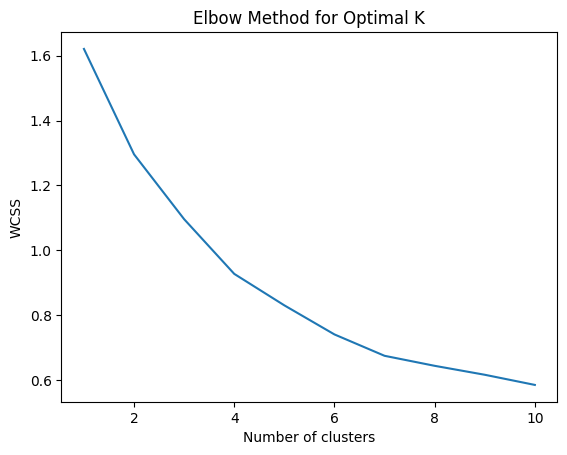

     CustomerID  cluster
0             1        0
1             2        1
2             3        0
3             4        1
4             5        0
..          ...      ...
195         196        2
196         197        4
197         198        2
198         199        4
199         200        2

[200 rows x 2 columns]


In [ ]:
wcss = []
for i in range(1, 11):
    centroids, distortion = kmeans(X_scaled, i)
    wcss.append(distortion)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

k = 5
centroids, _ = kmeans(X_scaled, k)
df['cluster'], _ = vq(X_scaled, centroids)

print(df[['CustomerID', 'cluster']])

In [ ]:
wcss = []
for i in range(1, 11):
   km = KMeans(n_clusters=i)
   km.fit_predict(x)
   wcss.append(km.inertia_)

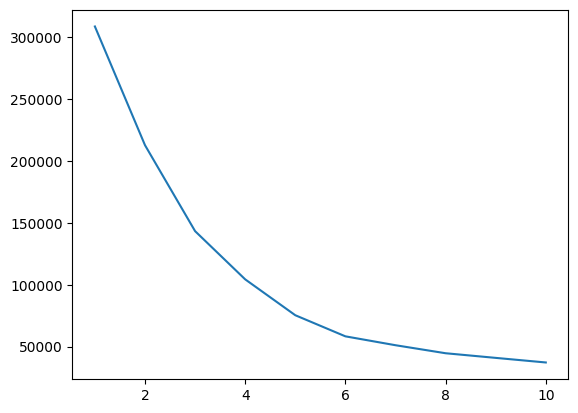

In [ ]:
plt.plot(range(1, 11),wcss)

In [ ]:
km = KMeans(n_clusters=5)
y_means = km.fit_predict(x)

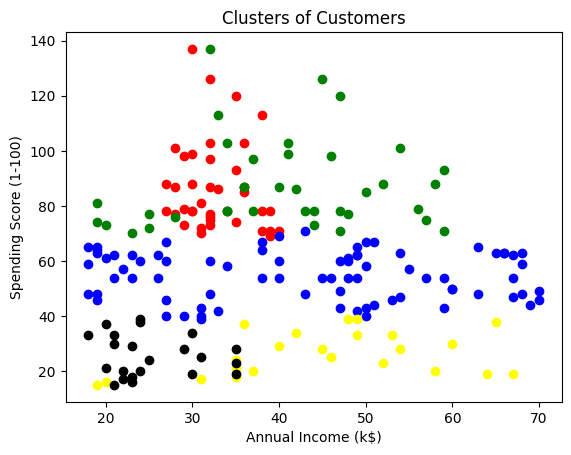

In [ ]:
plt.scatter(x.iloc[y_means == 0,0], x.iloc[y_means == 0,1], color='red')
plt.scatter(x.iloc[y_means == 1,0], x.iloc[y_means == 1,1], color='blue')
plt.scatter(x.iloc[y_means == 2,0], x.iloc[y_means == 2,1], color='green')
plt.scatter(x.iloc[y_means == 3,0], x.iloc[y_means == 3,1], color='yellow')
plt.scatter(x.iloc[y_means == 4,0], x.iloc[y_means == 4,1], color='black')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [ ]:
df['Target']=y_means

In [ ]:
Clustered_df=df
Clustered_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,Target
0,1,Male,19,15,39,0,3
1,2,Male,21,15,81,1,4
2,3,Female,20,16,6,0,3
3,4,Female,23,16,77,1,4
4,5,Female,31,17,40,0,3


In [ ]:
x = Clustered_df.iloc[:, 1:5]
y = Clustered_df.iloc[:, -1]

In [ ]:
x.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
y.head()

0    3
1    4
2    3
3    4
4    3
Name: Target, dtype: int32

In [ ]:
le = LabelEncoder()
x['Gender'] = le.fit_transform(x['Gender'])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
gbdt = GradientBoostingClassifier(n_estimators=100, random_state=2)

In [ ]:
gbdt.fit(x_train, y_train)
y_pred = gbdt.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.95

In [ ]:
y_pred = gbdt.predict(x_test)
y_pred

array([1, 4, 2, 0, 0, 1, 3, 1, 1, 4, 3, 1, 4, 2, 2, 3, 3, 4, 1, 3, 4, 4,
       3, 2, 0, 0, 1, 1, 1, 1, 2, 1, 4, 1, 1, 1, 2, 2, 0, 1], dtype=int32)

In [ ]:
prediction = pd.DataFrame({'Original value': y_test, 'predicted value': y_pred})
prediction.head()

,Original value,predicted value
112,1,1
29,4,4
182,2,2
199,0,0
193,0,0


In [ ]:
display(prediction)

,Original value,predicted value
112,1,1
29,4,4
182,2,2
199,0,0
193,0,0
85,1,1
10,3,3
54,1,1
115,1,1
35,4,4
